In [1]:
# %%capture
# !pip install torch numpy pandas matplotlib scikit-learn

# !pip install git+https://github.com/gretelai/gretel-synthetics.git

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached pandas-2.2.2-cp39-cp39-win_amd64.whl.metadata (19 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.0 kB ? eta -:--:--
     ------------------------------------- 165.0/165.0 kB 10.3 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp39-cp39-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ----------

  Running command git clone --filter=blob:none --quiet https://github.com/gretelai/gretel-synthetics.git 'C:\Users\lia68085\AppData\Local\Temp\pip-req-build-lmn7h_m9'


In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as md
import os
import json
import torch
from pathlib import Path

from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType



# Dataanalyse

In [8]:
# root=os.getcwd()
# parent_dir = os.path.dirname(root)
# parent_dir
# root=os.getcwd()
# datapath=os.path.join(parent_dir,'Dataanalyse\\axis2_demo_tablepart1_0.csv')
datapath=r'D:\studydata\Masterarbeit\Data\all_data_axis1.csv'

In [9]:
df=pd.read_csv(datapath)
df.shape

(2489582, 31)

In [43]:
2489582/2000

1244.791

In [10]:

def getdata(path, length,interval):
    df=pd.read_csv(path)
    with open ('important_features.json', 'r') as f:
        importance = json.load(f)[:10]
    importance=['Timestamp']+importance
    
    newdf=df[importance]
    newdf=newdf.copy()
    newdf['Timestamp'] = pd.to_datetime(newdf['Timestamp'], unit='s')
    difftiem=np.unique(newdf['Timestamp']) 
    data=[]
    for time in difftiem:
        length_of_data=len(newdf[newdf['Timestamp']==time])
        if length_of_data>length:
            slidedata=newdf[newdf['Timestamp']==time]
            slidedata=slidedata.copy()

            # slidedata['datetime'] = pd.date_range(start=slidedata['Timestamp'].iloc[0], periods=len(slidedata), freq=str(interval))
            # slidedata=slidedata.drop(columns=['Timestamp'], axis=1)

            data.append(slidedata)

    return data

In [13]:
data=getdata(datapath,2000,'S')

In [15]:
data[2].columns

Index(['Timestamp', 'Standardabweichung_y', 'Variance_z', 'Variance_y',
       'Standardabweichung_z', 'Effektivwert_x',
       'Mittlere_Absolute_Abweichung_y', 'Effektivwert_y',
       'Standardabweichung_x', 'Mittelwert_x', 'Variance_x'],
      dtype='object')

In [14]:
data[2].head()

,Timestamp,Standardabweichung_y,Variance_z,Variance_y,Standardabweichung_z,Effektivwert_x,Mittlere_Absolute_Abweichung_y,Effektivwert_y,Standardabweichung_x,Mittelwert_x,Variance_x
33876,2021-01-14 18:46:40,176.673,234365.0,31244.7,483.871,378.066,155.878,436.928,316.962,-206.080,100566.0
33877,2021-01-14 18:46:40,181.190,262538.0,32862.7,512.128,351.662,157.463,444.143,297.736,-187.136,88735.3
33878,2021-01-14 18:46:40,185.688,269670.0,34514.6,519.037,377.285,158.100,455.795,312.112,-211.968,97511.3
33879,2021-01-14 18:46:40,177.029,260317.0,31370.6,509.958,365.283,154.503,445.984,318.880,-178.176,101786.0
33880,2021-01-14 18:46:40,182.200,258206.0,33230.1,507.885,376.329,156.762,452.041,323.209,-192.768,104568.0


In [24]:
    
def dataconcatente(listdata):
     
    two = np.empty((0, 2000, 10))

    for i, data in enumerate(listdata):

        sensor_df=data
        all_column = list(sensor_df.columns)
        all_column.remove('Timestamp')
        train_df=sensor_df
        # train_df = train_df.drop(columns="datetime").to_numpy()
        train_df =pd.DataFrame(train_df)
        train_df = train_df.drop(columns="Timestamp").to_numpy()

        # print(train_df.shape)
        n = train_df.shape[0] // 2000
        train_df = train_df[:(n*2000),:].reshape(-1, 2000, train_df.shape[1])
        print(train_df.shape)
        two = np.concatenate((two, train_df), axis=0)
        print(two.shape)
        print('*'*20)
    return two

In [25]:
final=dataconcatente(data)
final.shape

(7, 2000, 10)
(7, 2000, 10)
********************
(8, 2000, 10)
(15, 2000, 10)
********************
(8, 2000, 10)
(23, 2000, 10)
********************
(8, 2000, 10)
(31, 2000, 10)
********************
(8, 2000, 10)
(39, 2000, 10)
********************
(6, 2000, 10)
(45, 2000, 10)
********************
(6, 2000, 10)
(51, 2000, 10)
********************
(8, 2000, 10)
(59, 2000, 10)
********************
(8, 2000, 10)
(67, 2000, 10)
********************
(8, 2000, 10)
(75, 2000, 10)
********************
(8, 2000, 10)
(83, 2000, 10)
********************
(8, 2000, 10)
(91, 2000, 10)
********************
(6, 2000, 10)
(97, 2000, 10)
********************
(8, 2000, 10)
(105, 2000, 10)
********************
(8, 2000, 10)
(113, 2000, 10)
********************
(8, 2000, 10)
(121, 2000, 10)
********************
(8, 2000, 10)
(129, 2000, 10)
********************
(8, 2000, 10)
(137, 2000, 10)
********************
(8, 2000, 10)
(145, 2000, 10)
********************
(8, 2000, 10)
(153, 2000, 10)
***************

(1131, 2000, 10)

In [58]:
# rootpath=os.getcwd()
# # go to the upper directory of rootpath
# rootpath=Path(rootpath).parents[0]
# #rootpath= './Thesis/Dataanalyse/'
# rootpath
# df=pd.read_csv(os.path.join(rootpath,'Dataanalyse/axis2_demo_tablepart1_0.csv'))
# with open (os.path.join(rootpath,'Dataanalyse/important_features.json'), 'r') as f:
#     features = json.load(f)[:10]
# features=['Timestamp']+features
# newdf=df[features]
# newdf=newdf.copy()
# newdf['Timestamp'] = pd.to_datetime(newdf['Timestamp'], unit='s')
# # create a new data column starting from the first timestamp, with a frequency of 1 second.
# newdf['datetime'] = pd.date_range(start=newdf['Timestamp'].iloc[0], periods=len(newdf), freq='S')
# newdf=newdf.drop(columns=['Timestamp'], axis=1)
# #change the last column to the first column
# cols = newdf.columns.tolist()   
# cols = cols[-1:] + cols[:-1]
# newdf=newdf[cols]
# newdf.head()
# newdf.to_csv('true_data.csv', index=False)

In [61]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import pandas as pd
# # fig,axs = plt.subplots(10,1,figsize=(10,2*10))

# # for i,j in enumerate(COLUMNS) :

# #     axs[i].plot(train_df["datetime"],train_df[j],label='GroundTruth')

# #     axs[i].legend()
# #     plt.ylabel("Temperature (Celsius)")
# #     plt.xlabel("Date")
# #     plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1000))  # 每10天显示一次日期
# #     plt.xticks(rotation=90)
# # plt.show()
# # # 假设 train_df 已经正确载入，并且 "datetime" 列已经转换为 datetime 类型
# fig, axs = plt.subplots(10, 1, figsize=(10, 20))  # 高度根据特征数量动态调整

# for i,j in enumerate(COLUMNS) :
#     # 如果只有一列，当只有一个特征时，axs不是列表，需要做一下处理
#     ax = axs[i] 
    
#     ax.plot(train_df[j], label='Actual')
#     ax.legend()
# plt.ylabel("Temperature (Celsius)")
# plt.xlabel("Date")
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1000))  # 每10天显示一次日期
# plt.xticks(rotation=90)
# plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
# plt.show()


In [26]:
x=list(data[0].columns)
x

['Timestamp',
 'Standardabweichung_y',
 'Variance_z',
 'Variance_y',
 'Standardabweichung_z',
 'Effektivwert_x',
 'Mittlere_Absolute_Abweichung_y',
 'Effektivwert_y',
 'Standardabweichung_x',
 'Mittelwert_x',
 'Variance_x']

In [27]:

xaxis_1day = data[0]["Timestamp"][:60]
len(xaxis_1day)
feat = list(data[0].columns)
feat.remove('Timestamp')

In [28]:
feat

['Standardabweichung_y',
 'Variance_z',
 'Variance_y',
 'Standardabweichung_z',
 'Effektivwert_x',
 'Mittlere_Absolute_Abweichung_y',
 'Effektivwert_y',
 'Standardabweichung_x',
 'Mittelwert_x',
 'Variance_x']

In [29]:
final[2,:,:].shape

(2000, 10)

In [30]:
range(5)

range(0, 5)

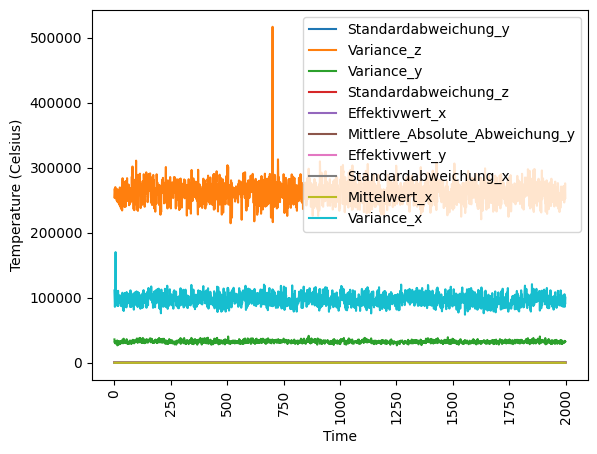

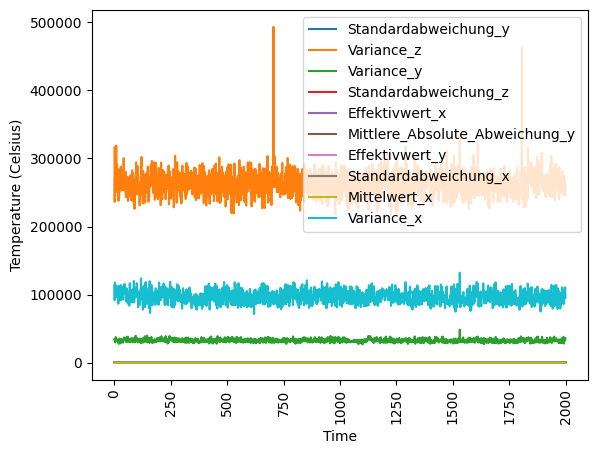

In [31]:
# # Show a few of the 1-day training samples

# xaxis_1day = data[0]["datetime"][:60]
# len(xaxis_1day)
# feat = list(data[0].columns)
# feat.remove('datetime')

def plot_day(f):
    for i, c in enumerate(feat):
        plt.plot(range(len(f)), f[:,i], label=c)
    # ax = plt.gca()
    # ax.xaxis.set_major_locator(md.HourLocator(byhour=range(2,24,3)))
    # ax.xaxis.set_major_formatter(md.DateFormatter("%H:%M"))
    # plt.gca().xaxis.set_major_locator(md.DayLocator(interval=int(len(xaxis_1day)/10)))  # 每10天显示一次日期

    plt.legend()
    plt.xlabel("Time")
    plt.xticks(rotation=90)

    plt.ylabel("Temperature (Celsius)")
    plt.show()

plot_day(final[6,:,:])
plot_day(final[8,:,:])
# plot_day(features[21,:,:])

In [32]:
# Recommended to train with a GPU
torch.cuda.is_available()

True

In [33]:
final.shape

(1131, 2000, 10)

In [34]:
max_sequence_len=final.shape[1]
max_sequence_len

2000

In [47]:
import time

# Train DGAN model
model = DGAN(DGANConfig(
    max_sequence_len=final.shape[1],
    sample_len=200,
    batch_size=32,
    apply_feature_scaling=True,
    apply_example_scaling=True,
    use_attribute_discriminator=True,
    generator_learning_rate=1e-4,
    discriminator_learning_rate=1e-4,
    epochs=50,
))
start_time = time.time()

model.train_numpy(
    final,
    feature_types=[OutputType.CONTINUOUS] * final.shape[2],
)

# Generate synthetic data
end_time = time.time()
epoch_time = end_time - start_time
print(f"Epoch {1} training time: {epoch_time:.2f} seconds")
_,synthetic_features = model.generate_numpy(500)
synthetic_features=np.array(synthetic_features)
import pickle
with open('synthetic_data.pkl', 'wb') as f:
    pickle.dump(synthetic_features, f)

Epoch 1 training time: 1779.42 seconds


In [45]:
_,synthetic_features = model.generate_numpy(500)


In [46]:
synthetic_features=np.array(synthetic_features)
synthetic_features.shape
# save the synthetic data as pickle file
import pickle
with open('synthetic_data.pkl', 'wb') as f:
    pickle.dump(synthetic_features, f)

(500, 2000, 10)

In [4]:
2489582/3

829860.6666666666

In [7]:
final=synthetic_features[:400]
final.shape

(400, 2000, 10)

In [1]:
import pickle
# Load the synthetic data
with open('synthetic_data.pkl', 'rb') as f:
    synthetic_features = pickle.load(f)
    

In [2]:
synthetic_features.shape

(500, 2000, 10)

In [5]:
plot_day(final[1,:,:])
plot_day(final[45,:,:])
plot_day(final[6,:,:])

NameError: name 'plot_day' is not defined

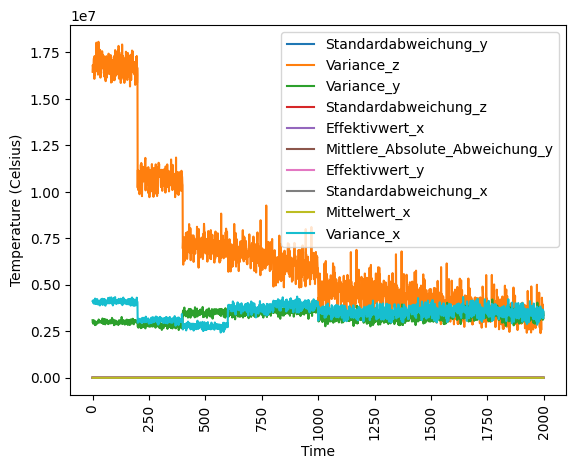

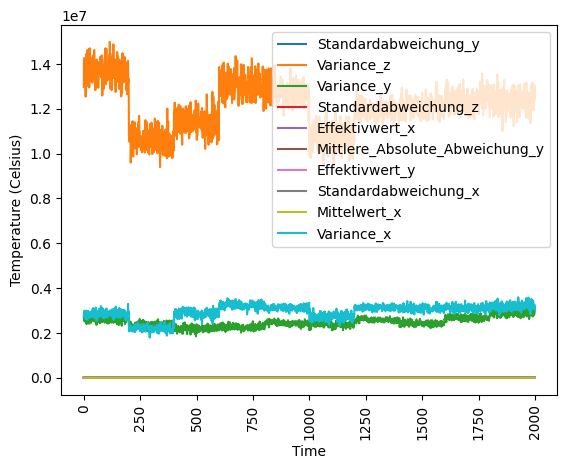

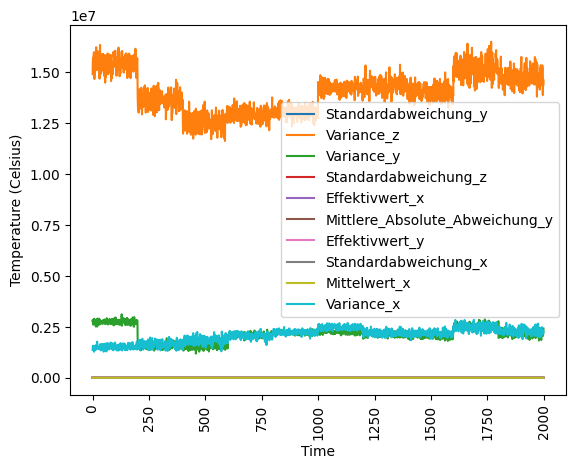

In [95]:
# Show some synthetic 1-day samples
plot_day(synthetic_features[1,:,:])
plot_day(synthetic_features[45,:,:])
plot_day(synthetic_features[10,:,:])

# Overall trends are similar to training samples, but with more local noise

In [16]:
synthetic_features.shape

(500, 2000, 10)

In [17]:
data[2].columns

Index(['Timestamp', 'Standardabweichung_y', 'Variance_z', 'Variance_y',
       'Standardabweichung_z', 'Effektivwert_x',
       'Mittlere_Absolute_Abweichung_y', 'Effektivwert_y',
       'Standardabweichung_x', 'Mittelwert_x', 'Variance_x'],
      dtype='object')

In [18]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta


# 获取当前时间
current_time = datetime.now()

# 生成UNIX时间戳列表，每个批次的时间戳相差一小时
timestamps = [(current_time + timedelta(hours=i)).timestamp() for i in range(synthetic_features.shape[0])]

# 为每个批次添加UNIX时间戳
# 扩展时间戳的形状，使其与 synthetic_features 匹配
timestamp_array = np.array(timestamps).reshape(-1, 1, 1)
timestamp_array = np.tile(timestamp_array, (1, synthetic_features.shape[1], 1))

# 合并时间戳和特征数据
synthetic_features_with_timestamps = np.concatenate((timestamp_array, synthetic_features), axis=2)

# 将三维数组转换为二维数据框
reshaped_features = synthetic_features_with_timestamps.reshape(-1, synthetic_features_with_timestamps.shape[2])

# 假设原始数据框的列名如下
columns =data[2].columns

# 创建数据框
synthetic_df = pd.DataFrame(reshaped_features, columns=columns)

# 打印数据框
print(synthetic_df)


           Timestamp  Standardabweichung_y  Variance_z   Variance_y  \
0       1.719248e+09            130.935013   7859338.0  1810773.125   
1       1.719248e+09            118.983566   8334222.5  1723374.750   
2       1.719248e+09            132.156174   8512899.0  1736353.500   
3       1.719248e+09            131.691650   7823354.5  1656044.000   
4       1.719248e+09            123.778328   8527875.0  1656661.625   
...              ...                   ...         ...          ...   
999995  1.721044e+09            469.303680   6424724.0  2319296.750   
999996  1.721044e+09            455.236115   6412121.5  2011810.000   
999997  1.721044e+09            461.012512   6242599.5  2245985.750   
999998  1.721044e+09            485.138947   6067121.5  2157200.000   
999999  1.721044e+09            450.344971   6015742.5  2150325.750   

        Standardabweichung_z  Effektivwert_x  Mittlere_Absolute_Abweichung_y  \
0                1079.481567      493.794006                      2

In [19]:
synthetic_df.to_csv('synthetic_data_all.csv', index=False)

In [51]:
synthetic_df = pd.DataFrame(synthetic_features.reshape(-1, synthetic_features.shape[2]), columns=data[2].columns[1:])
synthetic_df

,Standardabweichung_y,Variance_z,Variance_y,Standardabweichung_z,Effektivwert_x,Mittlere_Absolute_Abweichung_y,Effektivwert_y,Standardabweichung_x,Mittelwert_x,Variance_x
0,130.935013,7859338.0,1810773.125,1079.481567,493.794006,273.485931,552.316589,356.700134,2325.994141,2940758.750
1,118.983566,8334222.5,1723374.750,1065.441406,511.951050,257.979126,577.925964,345.737335,2354.773438,2970623.250
2,132.156174,8512899.0,1736353.500,1061.102783,474.714752,270.494537,580.453857,357.206299,2335.621094,2994200.250
3,131.691650,7823354.5,1656044.000,1072.017212,502.889343,268.975311,581.801208,347.659546,2336.212891,3017987.500
4,123.778328,8527875.0,1656661.625,1072.583496,496.393616,267.264160,591.844910,349.640137,2328.949219,3028490.250
...,...,...,...,...,...,...,...,...,...,...
999995,469.303680,6424724.0,2319296.750,85.945656,21546.000000,316.683441,1251.667969,572.346436,-20739.986328,1393142.250
999996,455.236115,6412121.5,2011810.000,94.679543,21572.828125,305.897705,1193.051636,558.031311,-20766.873047,1466927.125
999997,461.012512,6242599.5,2245985.750,89.118759,21572.744141,296.918060,1351.495483,522.215271,-20845.208984,1229816.000
999998,485.138947,6067121.5,2157200.000,85.727493,21553.021484,312.634552,1253.655029,531.425232,-20781.953125,1396170.625


In [52]:
# Compare (non-temporal) correlations between the 4 temperatures
synthetic_df = pd.DataFrame(synthetic_features.reshape(-1, synthetic_features.shape[2]), columns=data[2].columns[1:])

print("Correlation in real data:")
print(data[2].corr())
print()
print("Correlation in synthetic data:")
print(synthetic_df.corr())

# Correlations between temperature variables are similar

Correlation in real data:
                                Standardabweichung_y  Variance_z  Variance_y  \
Standardabweichung_y                        1.000000    0.056933    0.999734   
Variance_z                                  0.056933    1.000000    0.058436   
Variance_y                                  0.999734    0.058436    1.000000   
Standardabweichung_z                        0.055189    0.997859    0.056678   
Effektivwert_x                              0.090281    0.239871    0.090617   
Mittlere_Absolute_Abweichung_y              0.937270    0.041902    0.936805   
Effektivwert_y                              0.234633    0.021965    0.235972   
Standardabweichung_x                        0.113789    0.182469    0.114576   
Mittelwert_x                                0.017145   -0.230803    0.018056   
Variance_x                                  0.063893    0.107853    0.064401   

                                Standardabweichung_z  Effektivwert_x  \
Standardabweichung_y 

C:\Users\28968\AppData\Local\Temp\ipykernel_14528\1236717808.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data[2].corr())


                                Standardabweichung_y  Variance_z  Variance_y  \
Standardabweichung_y                        1.000000    0.639435    0.996043   
Variance_z                                  0.639435    1.000000    0.625905   
Variance_y                                  0.996043    0.625905    1.000000   
Standardabweichung_z                        0.676575    0.806228    0.681475   
Effektivwert_x                             -0.227443   -0.040452   -0.253891   
Mittlere_Absolute_Abweichung_y              0.996346    0.640640    0.995606   
Effektivwert_y                              0.994947    0.641695    0.995196   
Standardabweichung_x                        0.218839    0.473095    0.210360   
Mittelwert_x                                0.680153    0.327417    0.699327   
Variance_x                                  0.141192    0.352510    0.148665   

                                Standardabweichung_z  Effektivwert_x  \
Standardabweichung_y                        0.6

In [250]:
# 为简单起见，我们可以聚焦于比较单个特征
real_data_feature = final[:, :200, 0]  # 选择第一个特征
synthetic_data_feature = synthetic_features[:, :60, 0]

In [251]:
real_data_feature

array([[  163.966,   171.94 ,   156.322, ..., 11912.5  , 12591.6  ,
        12773.3  ],
       [11229.9  , 11260.3  , 11339.5  , ..., 10761.6  ,  9659.29 ,
         9303.04 ],
       [10217.1  ,  9543.58 ,  9655.06 , ..., 10579.8  , 10936.2  ,
        10466.9  ],
       ...,
       [  159.247,   157.613,   158.265, ...,   165.591,   162.439,
          178.834],
       [  167.667,   158.177,   163.255, ..., 11959.5  , 11237.9  ,
        11323.7  ],
       [12050.6  , 12114.   , 11973.1  , ..., 10149.6  , 10910.7  ,
        10299.4  ]])

In [252]:
synthetic_data_feature

array([[7565.2095, 8262.738 , 8237.246 , ..., 8029.8486, 8013.019 ,
        7753.1924],
       [5953.1753, 7016.008 , 6718.687 , ..., 6579.1973, 6732.96  ,
        6662.4736],
       [8344.961 , 8918.455 , 8788.019 , ..., 8711.466 , 8856.158 ,
        8766.829 ],
       ...,
       [6881.328 , 7564.1353, 7491.7944, ..., 7352.8857, 7463.8447,
        7357.8354],
       [7538.017 , 8234.417 , 8129.602 , ..., 8101.6675, 7997.0967,
        7983.5063],
       [6333.145 , 7124.308 , 7064.873 , ..., 6808.821 , 6915.8887,
        6807.8916]], dtype=float32)

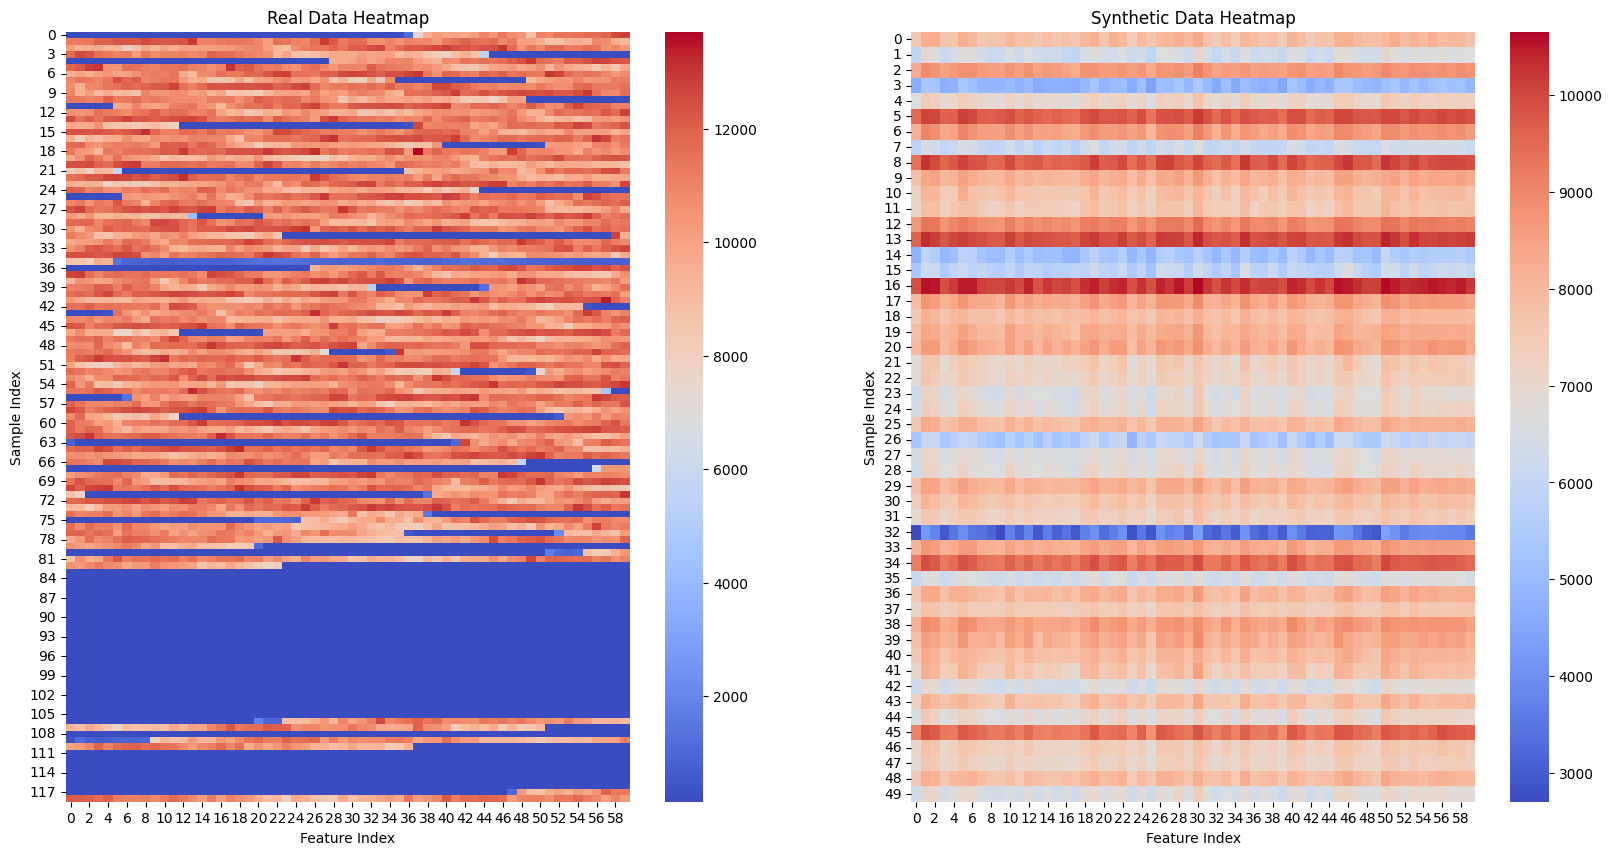

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.heatmap(real_data_feature, annot=False, cmap='coolwarm', cbar=True)
plt.title('Real Data Heatmap')
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')

plt.subplot(1, 2, 2)
sns.heatmap(synthetic_data_feature, annot=False, cmap='coolwarm', cbar=True)
plt.title('Synthetic Data Heatmap')
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')

plt.show()


In [59]:
final.shape

(1131, 2000, 10)

In [288]:
final[:,:,1].shape

(119, 60)

In [58]:
synthetic_features.shape

(500, 2000, 10)

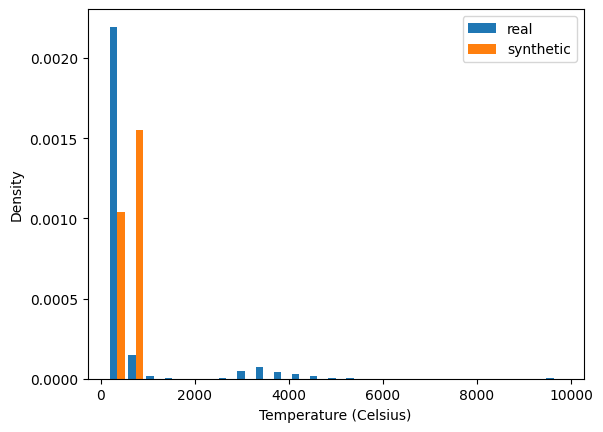

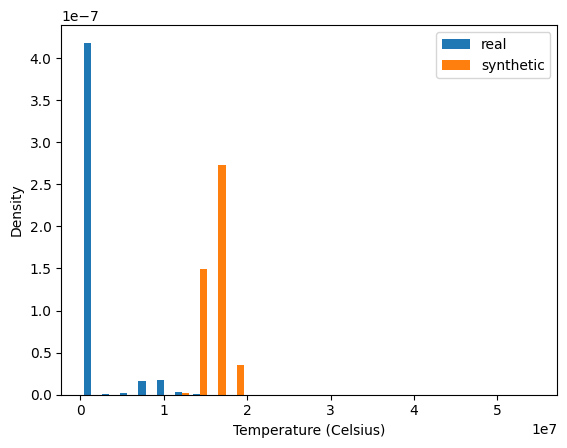

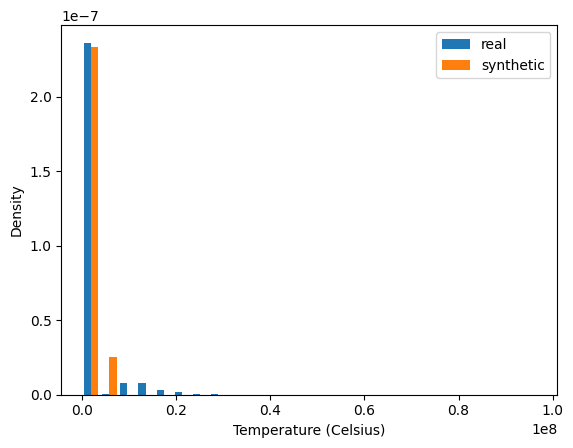

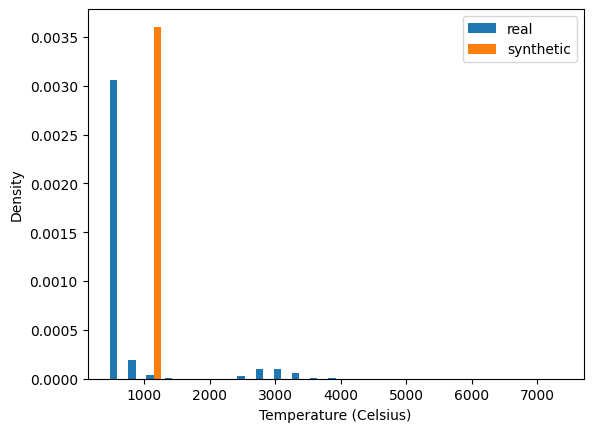

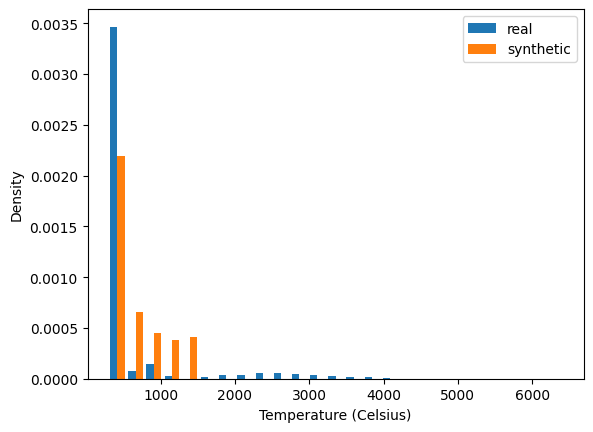

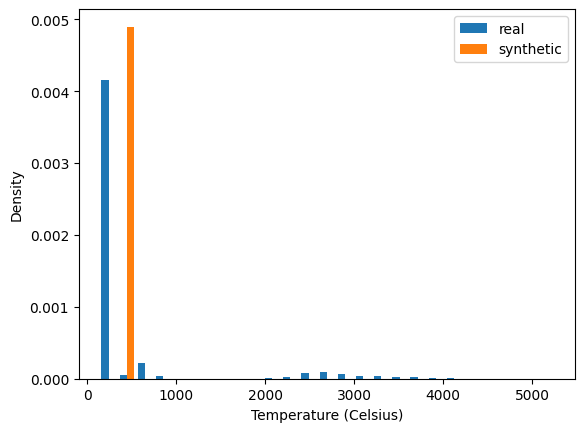

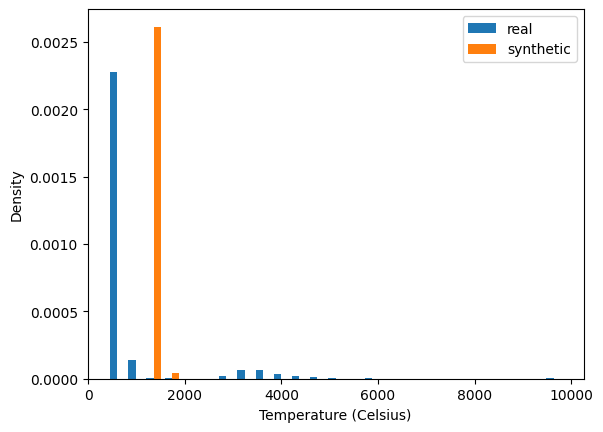

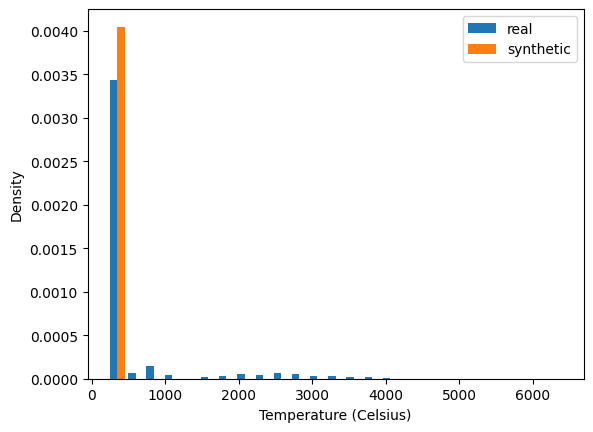

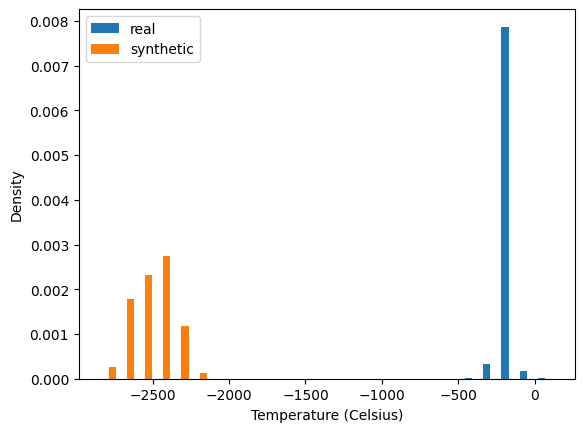

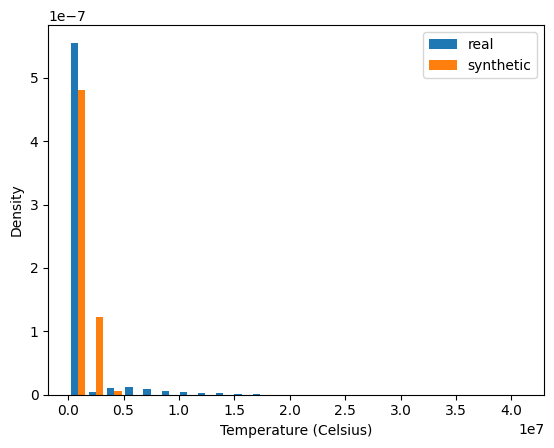

In [89]:
# Compare distribution of T_out values
for i in range(synthetic_features.shape[-1]):
    plt.hist([final[2,:,i].flatten(), synthetic_features[2,:,i].flatten()], 
             label=["real", "synthetic"],
             bins=25,
             density=True)
    plt.legend()
    plt.xlabel("Temperature (Celsius)")
    plt.ylabel("Density")
    plt.show()
# plt.hist([final[:,:,2].flatten(), synthetic_features[:,:,2].flatten()], 
#          label=["real", "synthetic"],
#          bins=25,
#          density=True)
# plt.legend()
# plt.xlabel("Temperature (Celsius)")
# plt.ylabel("Density")
# plt.show()

# Temperature distribution for T_out is similar

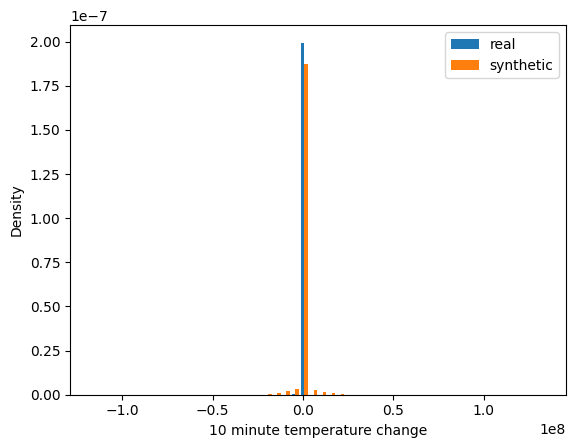

In [86]:
# Compare distribution of 1-step (10 minute) diffs for T_out
real_diffs = np.diff(final, axis=1)
synthetic_diffs = np.diff(synthetic_features, axis=1)

plt.hist([real_diffs[:,:,2].flatten(), synthetic_diffs[:,:,2].flatten()],
         label=["real", "synthetic"],
         bins=50,
         density=True)
plt.legend()
plt.xlabel("10 minute temperature change")
plt.ylabel("Density")
plt.show()

# 1-step diffs for synthetic data have higher variance, this aligns with the
# increased noise visible in the plots

In [91]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# 假设 synthetic_features 是你生成的合成数据
synthetic_features = np.array([
    [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],
    [[21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [31, 32, 33, 34, 35, 36, 37, 38, 39, 40]],
    [[41, 42, 43, 44, 45, 46, 47, 48, 49, 50], [51, 52, 53, 54, 55, 56, 57, 58, 59, 60]],
    [[61, 62, 63, 64, 65, 66, 67, 68, 69, 70], [71, 72, 73, 74, 75, 76, 77, 78, 79, 80]],
    [[81, 82, 83, 84, 85, 86, 87, 88, 89, 90], [91, 92, 93, 94, 95, 96, 97, 98, 99, 100]]
])

# 获取当前时间
current_time = datetime.now()

# 生成时间戳列表，每个批次的时间戳相差一小时
timestamps = [current_time + timedelta(hours=i) for i in range(synthetic_features.shape[0])]

# 为每个批次添加时间戳
# 扩展时间戳的形状，使其与 synthetic_features 匹配
timestamp_array = np.array(timestamps).reshape(-1, 1, 1)
timestamp_array = np.tile(timestamp_array, (1, synthetic_features.shape[1], 1))

# 合并时间戳和特征数据
synthetic_features_with_timestamps = np.concatenate((timestamp_array, synthetic_features), axis=2)

# 将三维数组转换为二维数据框
reshaped_features = synthetic_features_with_timestamps.reshape(-1, synthetic_features_with_timestamps.shape[2])

# 假设原始数据框的列名如下
columns = ['Time', 'Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10']

# 创建数据框
synthetic_df = pd.DataFrame(reshaped_features, columns=columns)

# 打印数据框
print(synthetic_df)


                        Time Feature1 Feature2 Feature3 Feature4 Feature5  \
0 2024-06-24 18:42:04.600952        1        2        3        4        5   
1 2024-06-24 18:42:04.600952       11       12       13       14       15   
2 2024-06-24 19:42:04.600952       21       22       23       24       25   
3 2024-06-24 19:42:04.600952       31       32       33       34       35   
4 2024-06-24 20:42:04.600952       41       42       43       44       45   
5 2024-06-24 20:42:04.600952       51       52       53       54       55   
6 2024-06-24 21:42:04.600952       61       62       63       64       65   
7 2024-06-24 21:42:04.600952       71       72       73       74       75   
8 2024-06-24 22:42:04.600952       81       82       83       84       85   
9 2024-06-24 22:42:04.600952       91       92       93       94       95   

  Feature6 Feature7 Feature8 Feature9 Feature10  
0        6        7        8        9        10  
1       16       17       18       19        20  
2 